In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#importing libraries
import numpy as np 
import matplotlib.pyplot as plt
from matplotlib import style
import pandas as pd
!pip install yfinance
import yfinance as yf
from pandas_datareader import data as pdr
import datetime as date
#!pip install ta-lib
from  sklearn.metrics import accuracy_score

from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score, roc_curve, auc
from sklearn.metrics import confusion_matrix

#reading the data
apple = pd.read_csv('/content/AAPL.csv')
apple

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


,Date,Open,High,Low,Close,Adj Close,Volume
0,2005-05-06,1.317500,1.333214,1.313929,1.330000,1.138845,326247600
1,2005-05-09,1.331429,1.337500,1.312500,1.320357,1.130588,355695200
2,2005-05-10,1.312500,1.330357,1.297500,1.300714,1.113768,440263600
3,2005-05-11,1.257143,1.273929,1.182500,1.271786,1.088997,2041981200
4,2005-05-12,1.265000,1.271071,1.214286,1.218929,1.043737,970242000
...,...,...,...,...,...,...,...
4275,2022-04-29,161.839996,166.199997,157.250000,157.649994,157.649994,131587100
4276,2022-05-02,156.710007,158.229996,153.270004,157.960007,157.960007,123055300
4277,2022-05-03,158.149994,160.710007,156.320007,159.479996,159.479996,88966500
4278,2022-05-04,159.669998,166.479996,159.259995,166.020004,166.020004,108256500


In [ ]:
apple=pd.DataFrame(apple)
# applying ffill() method to fill the missing values
apple=apple.ffill(axis = True)
apple[:]

,Date,Open,High,Low,Close,Adj Close,Volume
0,2005-05-06,1.3175,1.333214,1.313929,1.33,1.138845,326247600
1,2005-05-09,1.331429,1.3375,1.3125,1.320357,1.130588,355695200
2,2005-05-10,1.3125,1.330357,1.2975,1.300714,1.113768,440263600
3,2005-05-11,1.257143,1.273929,1.1825,1.271786,1.088997,2041981200
4,2005-05-12,1.265,1.271071,1.214286,1.218929,1.043737,970242000
...,...,...,...,...,...,...,...
4275,2022-04-29,161.839996,166.199997,157.25,157.649994,157.649994,131587100
4276,2022-05-02,156.710007,158.229996,153.270004,157.960007,157.960007,123055300
4277,2022-05-03,158.149994,160.710007,156.320007,159.479996,159.479996,88966500
4278,2022-05-04,159.669998,166.479996,159.259995,166.020004,166.020004,108256500


In [ ]:
#defining up & down signals
close=apple['Close'].transform(lambda x:x.shift(1)<x)
apple['Prediction']=close*1

#data cleaning
apple=apple.dropna()

apple_X=apple.drop(columns=['Prediction','Date'])
apple_y=apple['Prediction']

# defining train-test data set
X_train = apple_X[:int(apple_X.shape[0]*0.7)]
X_test = apple_X[int(apple_X.shape[0]*0.7):]
y_train = apple_y[:int(apple_X.shape[0]*0.7)]
y_test = apple_y[int(apple_X.shape[0]*0.7):]

In [ ]:
#Scaling
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train_std=sc.fit_transform(X_train)
X_test_std=sc.transform(X_test)

#PCA application
from sklearn.decomposition import PCA
pca = PCA(n_components=0.95)
X_train_pca = pca.fit_transform(X_train_std)
X_test_pca=pca.transform(X_test_std)

**LSTM**

In [ ]:
#importing the packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pylab import rcParams
from sklearn.preprocessing import MinMaxScaler
#used for setting the output figure size
rcParams['figure.figsize'] = 20,10
#to normalize the given input data
scaler = MinMaxScaler(feature_range=(0, 1))
#to read input data set (place the file name inside  ' ') as shown below
todataframe = apple
#to print the first few data in the data set
todataframe.head(10)

,Date,Open,High,Low,Close,Adj Close,Volume,Prediction
0,2005-05-06,1.3175,1.333214,1.313929,1.33,1.138845,326247600,0
1,2005-05-09,1.331429,1.3375,1.3125,1.320357,1.130588,355695200,0
2,2005-05-10,1.3125,1.330357,1.2975,1.300714,1.113768,440263600,0
3,2005-05-11,1.257143,1.273929,1.1825,1.271786,1.088997,2041981200,0
4,2005-05-12,1.265,1.271071,1.214286,1.218929,1.043737,970242000,0
5,2005-05-13,1.221429,1.258214,1.216786,1.241786,1.063309,702713200,1
6,2005-05-16,1.234286,1.275,1.233214,1.269643,1.087162,474294800,1
7,2005-05-17,1.255,1.266429,1.233571,1.262857,1.081352,588344400,0
8,2005-05-18,1.266071,1.341429,1.249643,1.28,1.096031,636722800,1
9,2005-05-19,1.277857,1.345714,1.277857,1.341071,1.148324,793161600,1


In [ ]:
# Extracting the closing prices of each day
FullData=apple[['Close']].values
print(FullData[0:10])
 
# Feature Scaling for fast training of neural networks
from sklearn.preprocessing import StandardScaler, MinMaxScaler
 
# Choosing between Standardization or normalization
#sc = StandardScaler()
sc=MinMaxScaler()
 
DataScaler = sc.fit(FullData)
X=DataScaler.transform(FullData)
#X=FullData
 
print('### After Normalization ###')
X[0:5]

[[1.33]
 [1.320357]
 [1.300714]
 [1.271786]
 [1.218929]
 [1.241786]
 [1.269643]
 [1.262857]
 [1.28]
 [1.341071]]
### After Normalization ###


array([[0.00061436],
       [0.00056102],
       [0.00045237],
       [0.00029237],
       [0.        ]])

**Preparing the data for LSTM**

In [ ]:
#split into samples
X_samples = list()
y_samples = list()

NumerOfRows = len(X)
TimeSteps=10  # next day's Price Prediction is based on last how many past day's prices

# Iterate thru the values to create combinations
for i in range(TimeSteps , NumerOfRows , 1):
    x_sample = X[i-TimeSteps:i]
    y_sample = X[i]
    X_samples.append(x_sample)
    y_samples.append(y_sample)

################################################
# Reshape the Input as a 3D (number of samples, Time Steps, Features)
X_data=np.array(X_samples)
X_data=X_data.reshape(X_data.shape[0],X_data.shape[1], 1)
print('\n#### Input Data shape ####')
print(X_data.shape)

# We do not reshape y as a 3D data  as it is supposed to be a single column only
y_data=np.array(y_samples)
y_data=y_data.reshape(y_data.shape[0], 1)
print('\n#### Output Data shape ####')
print(y_data.shape)


#### Input Data shape ####
(4270, 10, 1)

#### Output Data shape ####
(4270, 1)


**Visualizing the input and output data for LSTM**

In [ ]:
# Visualizing the input and output being sent to the LSTM model
for inp, out in zip(X_train[0:2], y_train[0:2]):
    print(inp,'--', out)

Open -- 0
High -- 0


**Creating the Deep Learning LSTM model**

In [ ]:
#split into samples
X_samples = list()
y_samples = list()

NumerOfRows = len(X)
TimeSteps=10  # next day's Price Prediction is based on last how many past day's prices

# Iterate thru the values to create combinations
for i in range(TimeSteps , NumerOfRows , 1):
    x_sample = X[i-TimeSteps:i]
    y_sample = X[i]
    X_samples.append(x_sample)
    y_samples.append(y_sample)

################################################
# Reshape the Input as a 3D (number of samples, Time Steps, Features)
X_data=np.array(X_samples)
X_data=X_data.reshape(X_data.shape[0],X_data.shape[1], 1)
print('\n#### Input Data shape ####')
print(X_data.shape)

# We do not reshape y as a 3D data  as it is supposed to be a single column only
y_data=np.array(y_samples)
y_data=y_data.reshape(y_data.shape[0], 1)
print('\n#### Output Data shape ####')
print(y_data.shape)


#### Input Data shape ####
(4270, 10, 1)

#### Output Data shape ####
(4270, 1)


In [ ]:
# Choosing the number of testing data records
TestingRecords=980
 
# Splitting the data into train and test
X_train=X_data[:-TestingRecords]
X_test=X_data[-TestingRecords:]
y_train=y_data[:-TestingRecords]
y_test=y_data[-TestingRecords:]
 
############################################
 
# Printing the shape of training and testing
print('\n#### Training Data shape ####')
print(X_train.shape)
print(y_train.shape)
print('\n#### Testing Data shape ####')
print(X_test.shape)
print(y_test.shape)


#### Training Data shape ####
(3290, 10, 1)
(3290, 1)

#### Testing Data shape ####
(980, 10, 1)
(980, 1)


In [ ]:
# Defining Input shapes for LSTM
TimeSteps=X_train.shape[1]
TotalFeatures=X_train.shape[2]
print("Number of TimeSteps:", TimeSteps)
print("Number of Features:", TotalFeatures)

Number of TimeSteps: 10
Number of Features: 1


In [ ]:
# Importing the Keras libraries and packages
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
 
# Initialising the RNN
regressor = Sequential()
 
# Adding the First input hidden layer and the LSTM layer
# return_sequences = True, means the output of every time step to be shared with hidden next layer
regressor.add(LSTM(units = 10, activation = 'relu', input_shape = (TimeSteps, TotalFeatures), return_sequences=True))
 
# Adding the Second Second hidden layer and the LSTM layer
regressor.add(LSTM(units = 5, activation = 'relu', input_shape = (TimeSteps, TotalFeatures), return_sequences=True))
 
# Adding the Second Third hidden layer and the LSTM layer
regressor.add(LSTM(units = 5, activation = 'relu', return_sequences=False ))
 
 
# Adding the output layer
regressor.add(Dense(units = 1))
 
# Compiling the RNN
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')
 
##################################################
 
import time
# Measuring the time taken by the model to train
StartTime=time.time()
 
# Fitting the RNN to the Training set
regressor.fit(X_train, y_train, batch_size = 5, epochs = 100)
 
EndTime=time.time()
print("## Total Time Taken: ", round((EndTime-StartTime)/60), 'Minutes ##')

Epoch 1/100
658/658 [==============================] - 12s 13ms/step - loss: 2.0103e-04
Epoch 2/100
658/658 [==============================] - 11s 16ms/step - loss: 2.5993e-05
Epoch 3/100
658/658 [==============================] - 10s 15ms/step - loss: 2.6684e-05
Epoch 4/100
658/658 [==============================] - 10s 15ms/step - loss: 2.6560e-05
Epoch 5/100
658/658 [==============================] - 7s 11ms/step - loss: 2.4546e-05
Epoch 6/100
658/658 [==============================] - 5s 8ms/step - loss: 2.8055e-05
Epoch 7/100
658/658 [==============================] - 5s 8ms/step - loss: 2.4561e-05
Epoch 8/100
658/658 [==============================] - 5s 8ms/step - loss: 2.2821e-05
Epoch 9/100
658/658 [==============================] - 6s 8ms/step - loss: 2.3613e-05
Epoch 10/100
658/658 [==============================] - 5s 8ms/step - loss: 2.4902e-05
Epoch 11/100
658/658 [==============================] - 5s 8ms/step - loss: 2.4988e-05
Epoch 12/100
658/658 [=====================

In [ ]:
print(regressor.summary())

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_12 (LSTM)              (None, 10, 10)            480       
                                                                 
 lstm_13 (LSTM)              (None, 10, 5)             320       
                                                                 
 lstm_14 (LSTM)              (None, 5)                 220       
                                                                 
 dense_4 (Dense)             (None, 1)                 6         
                                                                 
Total params: 1,026
Trainable params: 1,026
Non-trainable params: 0
_________________________________________________________________
None


**Measuring the accuracy of the model on testing data**

Accuracy: 89.5005676886829


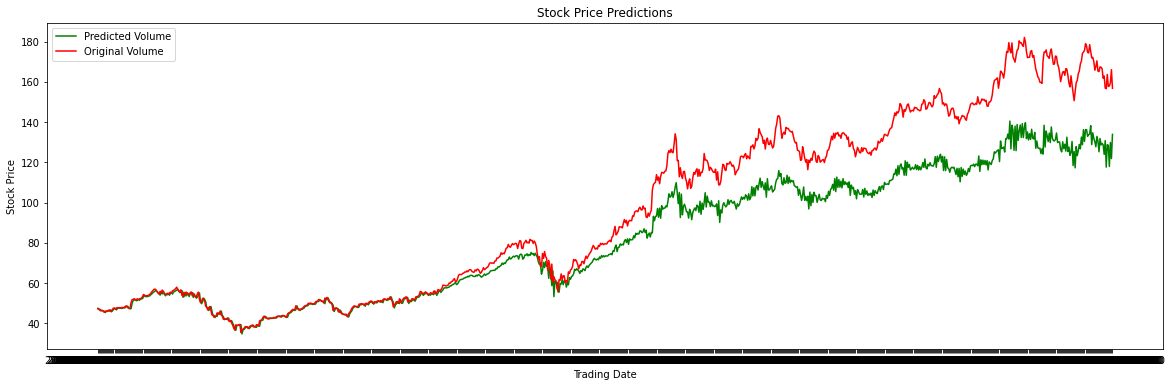

In [ ]:
# Making predictions on test data

predicted_Price = regressor.predict(X_test)
predicted_Price = DataScaler.inverse_transform(predicted_Price)

 # Getting the original price values for testing data
orig=y_test
orig=DataScaler.inverse_transform(y_test)
 
# Accuracy of the predictions
print('Accuracy:', 100 - (100*(abs(orig-predicted_Price)/orig)).mean())
 
# Visualising the results
import matplotlib.pyplot as plt
 
plt.plot(predicted_Price, color = 'green', label = 'Predicted Volume')
plt.plot(orig, color = 'red', label = 'Original Volume')
 
plt.title('Stock Price Predictions')
todataframe['Date'] = pd.to_datetime(todataframe.Date,format='%Y-%m-%d')
todataframe.index = todataframe['Date']
plt.xlabel('Trading Date')
plt.xticks(range(TestingRecords), apple.tail(TestingRecords)['Date'])
plt.ylabel('Stock Price')
 
plt.legend()
fig=plt.gcf()
fig.set_figwidth(20)
fig.set_figheight(6)
plt.show()

**Regressor Metrics**

In [ ]:
from sklearn.metrics import explained_variance_score
print(explained_variance_score(orig, predicted_Price, multioutput='raw_values'))

[0.90169523]


In [ ]:
from sklearn.metrics import max_error
print(max_error(orig, predicted_Price))

47.86921697070312


In [ ]:
from sklearn.metrics import mean_absolute_error
print(mean_absolute_error(orig, predicted_Price))

13.710593009487106


In [ ]:
from sklearn.metrics import mean_squared_error
print(mean_squared_error(orig, predicted_Price))

376.47274654357045


In [ ]:
from sklearn.metrics import mean_squared_log_error
print(mean_squared_log_error(orig, predicted_Price))

0.022065421839967368


In [ ]:
from sklearn.metrics import mean_absolute_percentage_error
print(mean_absolute_percentage_error(orig, predicted_Price))

0.10499432311317099


In [ ]:
from sklearn.metrics import median_absolute_error
print(median_absolute_error(orig, predicted_Price))

7.400676863525391


In [ ]:
from sklearn.metrics import r2_score
print(r2_score(orig, predicted_Price))

0.8084977985003489


In [ ]:
from sklearn.metrics import mean_tweedie_deviance
print(mean_tweedie_deviance(orig, predicted_Price))

376.47274654357045


In [ ]:
from sklearn.metrics import mean_pinball_loss
print(mean_pinball_loss(orig, predicted_Price))

6.855296504743553


**Visualizing the predictions for full data**

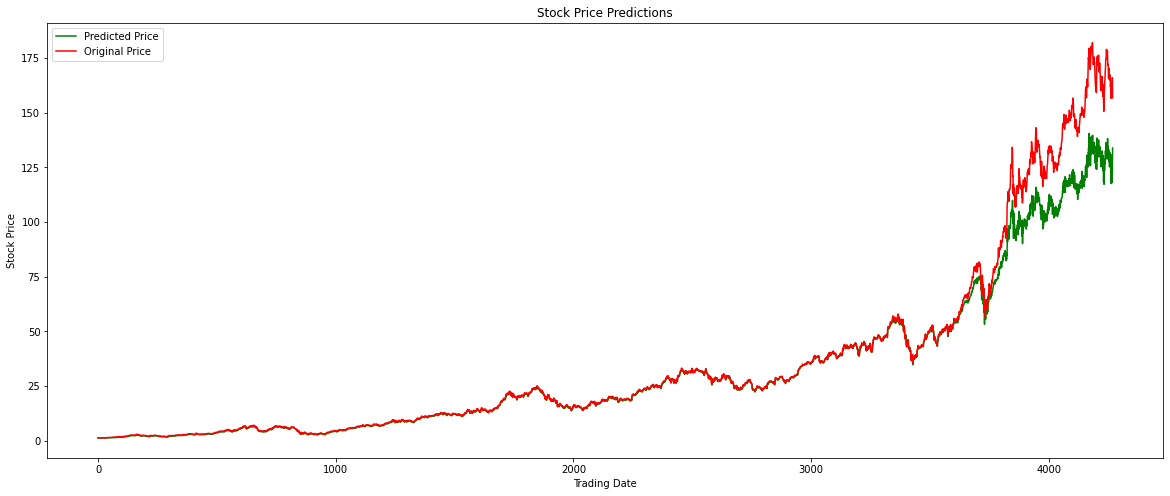

In [ ]:
# Generating predictions on full data
TrainPredictions=DataScaler.inverse_transform(regressor.predict(X_train))
TestPredictions=DataScaler.inverse_transform(regressor.predict(X_test))
 
FullDataPredictions=np.append(TrainPredictions, TestPredictions)
FullDataOrig=FullData[TimeSteps:]
 
# plotting the full data
plt.plot(FullDataPredictions, color = 'green', label = 'Predicted Price')
plt.plot(FullDataOrig , color = 'red', label = 'Original Price')
 
 
plt.title('Stock Price Predictions')
plt.xlabel('Trading Date')
plt.ylabel('Stock Price')
plt.legend()
fig=plt.gcf()
fig.set_figwidth(20)
fig.set_figheight(8)
plt.show()